# Plotting in Examples Formulas and Open Data in Matplotlib

For a start, you need sth that you can actually plot. 

1. [Explicit Formulas](#1)
2. [Numerical Simulations](#2)
3. [Your own Measurements](#3)
4. [Open Data](#4)

For more, check out the official matplotlib introduction jupyter notebook at https://matplotlib.org/stable/tutorials/introductory/pyplot.html.

## 1. Formulas<a class="anchor" id=1></a>
**1st Example**: explicit: inverse Gaussian distribution = Wald distribution
    

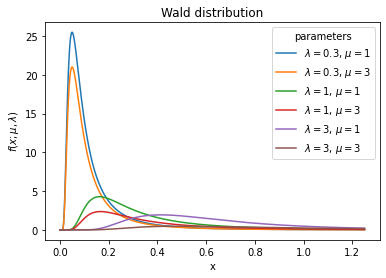

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import itertools # for creating combinations of plotting parameters

def wald(x, p_lambda, mu):
    """
    Wald distribution / Inverse Gaussian distribution
    Two parameter probability distribution
    mu       :: mean
    p_lambda :: shape parameter lambda
    """
    return p_lambda/(2*np.pi*x**3)*np.exp(-p_lambda*(x-mu)**2/(2*mu**2*x))

# create canvas
f, ax = plt.subplots()

# parameters
N_x = 1000
x= np.linspace(0.001, 1.25, N_x)
p_lambda = [0.3, 1, 3]
mu = [1, 3]

# plotting several lines cannot be done at once with pure matplotlib, you need to iterate
for lam, m in itertools.product(p_lambda, mu):
    y = wald(x, lam, m)
    ax.plot(x, y, label = r"$\lambda=$"+repr(lam)+r", $\mu=$"+repr(m))

# labelling    
ax.set_title("Wald distribution")
ax.set_xlabel("x")
ax.set_ylabel(r"$f(x; \mu, \lambda)$")

# legend
ax.legend(loc=1, title = "parameters")

**2nd Example**: plot a full circle at once (parametrization)


(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

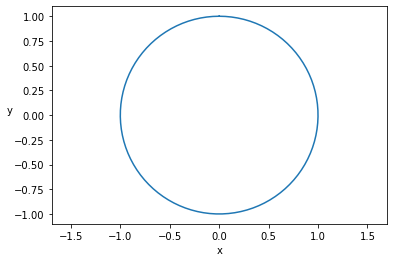

In [2]:
# generate numpy array with angles between 0 and 2pi
phi = np.linspace(0., 2*np.pi, 100)

# create canvas
f, ax = plt.subplots()

# plot parametrization
ax.plot(np.sin(phi), np.cos(phi))

# scale x- and y-axis equally, so the circle actually looks like a circle 
ax.axis('equal')
# axis labelling
ax.set_xlabel("x"), ax.set_ylabel("y", rotation=0)

**3rd Example**: it might seem harder to find a parametrization of this implicit function: $x\sin(x) = y^2\cos(y)$
so you can plot it as a contour plot. Once you see the result, you regognize that it is a Lissajous curve, so you immedeatly know the correct parametrization. 


(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

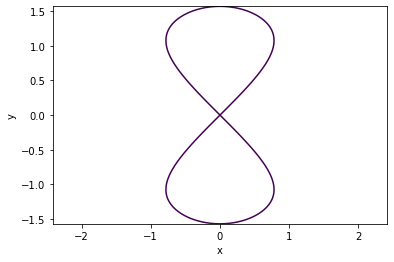

In [3]:
# x*sin(x) = y^2*cos(y)      (1)
# generate numpy arrays with angles between -pi/2 and pi/2 (principal branch)
x = np.linspace(-np.pi/2, np.pi/2, 1000)
y = np.linspace(-np.pi/2, np.pi/2, 1000)

# create grid on which contour is plotted
X, Y = np.meshgrid(x, y)

# F = left side of the equation, G = right side
F = X*np.sin(X)
G = Y**2*np.cos(Y)

f, ax = plt.subplots()
# plot contour for which Z = F - G = 0
ax.contour(X, Y, (F - G), [0]) 

ax.axis('equal')
ax.set_xlabel("x"), ax.set_ylabel("y")

**4th Example:**
Plot threedimensional formulas like:

$$R(\theta, \phi) = \cos(\phi^2), \quad\theta\in[0, 2\pi], \quad\phi\in[0,\pi]$$

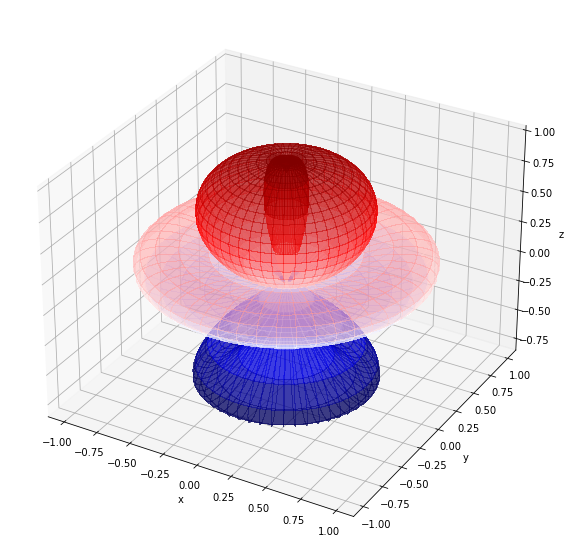

In [4]:
# load 3d plotting tools
import mpl_toolkits.mplot3d.axes3d as axes3d

# create meshgrid of intervals for theta and phi
theta, phi = np.linspace(0, 2*np.pi, 100), np.linspace(0, np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)

# calculate R on the mesh
R = np.cos(PHI**2)
# calculate X, Y, Z values on the mesh
X = R*np.sin(PHI)*np.cos(THETA)
Y = R*np.sin(PHI)*np.sin(THETA)
Z = R*np.cos(PHI)

# create 3d canvas
f = plt.figure(figsize = (10, 10))
ax = f.add_subplot(1,1,1, projection='3d')
# plot 3d shape
plot = ax.plot_surface(X, Y, Z,  
                       cmap=plt.get_cmap('seismic'),
                       antialiased=False, 
                       alpha=0.5)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")


plt.show()

## 2. Numerical Simulations <a class="anchor" id=2></a>
Example: Complex Kuramoto Order Parameter

In [5]:
"""
plot complex Kuramoto order parameter for a finite number of oscillators
"""

# public modules
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
import os
from scipy.integrate import odeint # integration of dynamical equations
import time

def func(y, t, N_osc, omg, epsilon):
    """ Kuramoto model with natural frequencies omg, 
    global identical coupling epsilon, 
    N_osc oscillators, y[k] == \theta_k
    \dot\theta_k=\omega_k+\frac{\epsilon}{N}\sum_{j=1}^N\sin(\theta_j-\theta_k)
    """
    y_help = np.zeros((N_osc))
    for i in np.arange(N_osc):
        y_help[i] = sum(np.sin(y-y[i]))
    return (omg + epsilon*y_help / N_osc)
    
# system parameter
N_osc   = 25             # number of oscillators
spread  = 1              # spread of oscillators natural frequency distribution
omg     = np.sort(spread*np.random.randn(N_osc)) # natural frequencies, ordered
epsilon = 1.8          # coupling strength

# intergration and parameters   
N_time  = 10**4 # time steps
delta_t = 0.01
y0      = (4*np.random.randn(N_osc))%(2.*np.pi) # random initial conditions of N_osc phases
t       = np.arange(N_time)*delta_t      # time points startin with init cond
y       = odeint(func, y0, t, (N_osc, omg, epsilon))%(2*np.pi) # cpp integrator dynamical systems

# complex order parameter and its phase
order = np.sum(np.cos(y)+1j*np.sin(y), axis=1)/N_osc
phi   = np.angle(order)

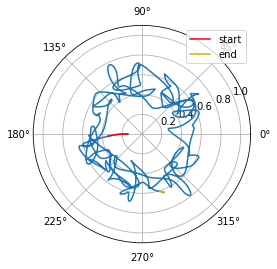

In [6]:
# plot complex order parameter in complex (=polar) plane
ax = plt.subplot(111, polar=True)

# plot trajectory
ax.plot(phi, abs(order))

# distinguish start and ending of the trajectory with different colors
ax.plot(phi[0:50], abs(order[0:50]), label = 'start', color="r")
ax.plot(phi[N_time-50:N_time-1],abs(order[N_time-50:N_time-1]), label = 'end', color="y")

# set maximum value for radius
ax.set_rmax(1.1)

# legend & grid
plt.legend(loc = 1)
ax.grid(True)

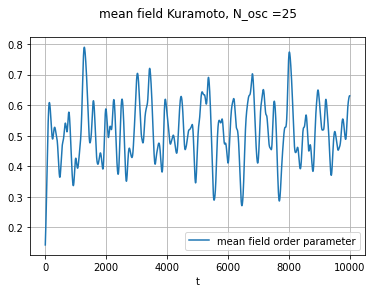

In [7]:
# plot absolute value over time 
plt.plot(abs(order), label = 'mean field order parameter')
plt.legend(loc = 'best')
xl = plt.xlabel('t')
plt.title('mean field Kuramoto, N_osc ='+repr(N_osc)+"\n")
plt.grid(True)

# 3. Own Measurements<a class="anchor" id=3></a>

Plotting your own data is the same as plotting other peoples data with the difference that
- you already know the detailed specifics of your data (because you **documented** them well).
- you get to choose the file format in which you store the data (e.g. consider hdf5 and numpy.savez for larger datasets)
Make sure you store all necessary data for reproducing your research (store it both with the data set and in the figure caption). The best way to plan this is writing a detailed well-thought-through Data Management Plan, and update it during the course of the research.


# 4. Open Data<a class="anchor" id=4></a>

With other peoples dataset in contrast, it can be quite hard to find out, how which data was obtained exactly (and therefore what it means), especially if it is not **documented** well. Also you might come across very wild types of file formats. We here use analisi.transparencia.cat, because it offers an API, reasonably good documentation, and - interesting data.

In [8]:
import pandas as pd
from sodapy import Socrata # Was not in the installation list for this course! 
                           #Use "pip install sodapy" or "conda install sodapy" to install

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)
print("Format of dataset: ", type(client))

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# from: https://analisi.transparenciacatalunya.cat/Salut/Vacunaci-per-al-COVID-19-dosis-administrades-per-m/irki-p3c7
results = client.get("irki-p3c7", limit=2000) # 2000 is the number of rows that we scrape from the web page

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

Format of dataset:  <class 'sodapy.socrata.Socrata'>


,sexe_codi,sexe,provincia_codi,provincia,comarca_codi,comarca,municipi_codi,municipi,districte,dosi,data,fabricant,recompte,no_vacunat,districte_codi
0,0,Home,17,Girona,02,ALT EMPORDA,17182,SANTA LLOGAIA D'ÀLGUEMA,No classificat,1,2021-06-28T00:00:00.000,BioNTech / Pfizer,2,NaN,NaN
1,0,Home,08,Barcelona,41,VALLES ORIENTAL,08294,VALLGORGUINA,No classificat,1,2021-04-01T00:00:00.000,Oxford / AstraZeneca,2,NaN,NaN
2,0,Home,NaN,No classificat,NaN,No classificat,NaN,(Altres municipis),No classificat,1,2021-05-14T00:00:00.000,No administrada,8,No vacunat,NaN
3,0,Home,08,Barcelona,14,BERGUEDA,08299,VILADA,No classificat,1,2022-01-07T00:00:00.000,Moderna / Lonza,1,NaN,NaN
4,0,Home,25,Lleida,05,ALTA RIBAGORÇA,25173,EL PONT DE SUERT,No classificat,1,2021-04-01T00:00:00.000,Oxford / AstraZeneca,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,Home,08,Barcelona,07,BAGES,08140,NAVARCLES,No classificat,2,2021-11-30T00:00:00.000,BioNTech / Pfizer,3,NaN,NaN
1996,1,Dona,08,Barcelona,41,VALLES ORIENTAL,08033,CALDES DE MONTBUI,No classificat,2,2021-08-03T00:00:00.000,Oxford / AstraZeneca,1,NaN,NaN
1997,0,Home,08,Barcelona,07,BAGES,08229,SANT MATEU DE BAGES,No classificat,1,2021-04-01T00:00:00.000,BioNTech / Pfizer,3,NaN,NaN
1998,0,Home,08,Barcelona,03,ALT PENEDES,08273,SUBIRATS,No classificat,1,2021-04-01T00:00:00.000,Oxford / AstraZeneca,3,NaN,NaN


#### Where possible, translate Catalan texts into English in your plots.

Text(0, 0.5, 'Number of entries in data base')

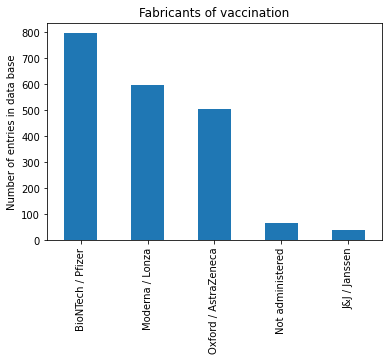

In [9]:
results_df.fabricant.value_counts().rename({"No administrada":"Not administered"}).plot(kind="bar")
plt.gcf().gca().set_title("Fabricants of vaccination")
plt.gcf().gca().set_ylabel("Number of entries in data base")

### Bad example: 
Plot daily counts as line plot.

Text(0, 0.5, '# vaccinations')

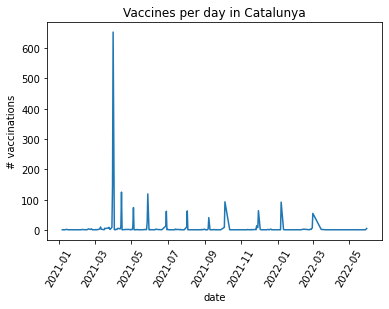

In [10]:
# plot dates of vaccinations
from datetime import datetime
import pandas as pd

f, ax = plt.subplots()
# convert dates in table to python datetimes
dates = pd.Series([datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S.%f').date() for date_time_str in results_df["data"]])
vaccines_per_date = dates.value_counts().sort_index() # count vaccinations per date and save in pandas dataframe
l1, = ax.plot(vaccines_per_date.index, vaccines_per_date)
# make dates better readable by tilting
plt.xticks(rotation=60)
# label everything
ax.set_title("Vaccines per day in Catalunya")
ax.set_xlabel("date")
ax.set_ylabel("# vaccinations")

#### Better:
Barplot!

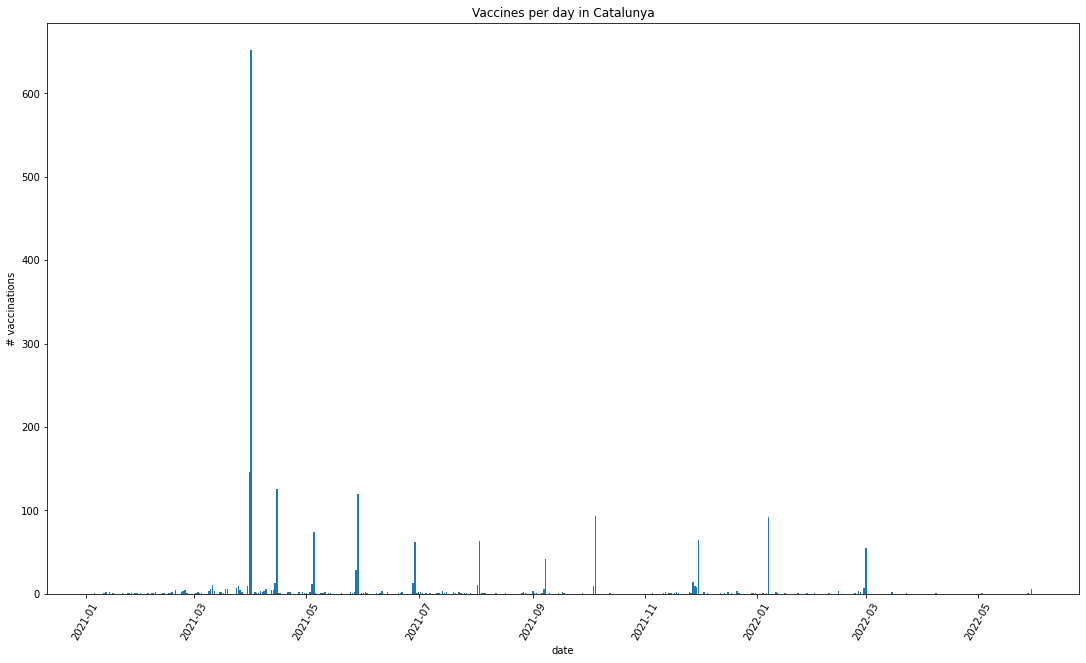

In [11]:
l1.remove()
ax.bar(vaccines_per_date.index, vaccines_per_date)
#ax.set_ylim([0, 90])
f.set_size_inches(18.5, 10.5)
f

Observation: In the two plots above, it would probably would more sense to plot the y-axis in logarithmic scale with <code>ax.semilogy()</code>. **Try it out 0:-)**

<AxesSubplot:ylabel='province'>

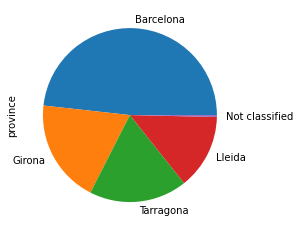

In [12]:
# also plotting the provinces in a pie chart is a pandas oneliner
results_df["provincia"].rename("province").value_counts().rename({"No classificat":"Not classified"}).plot(kind = 'pie')

### Beyond matplotlib

In [14]:
"""
IMPORTANT: To execute this cell you need to install geopandas and pandas_bokeh before.

The shapes of the regions corresponding to a postal code were taken from:
https://github.com/inigoflores/ds-codigos-postales
"""

import geopandas as gpd
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
from bokeh.plotting import figure, output_file, save

# load files with shapes for postal codes
cp_barna  = gpd.read_file("ds-codigos-postales-master/data/BARCELONA.geojson" )
cp_lleida = gpd.read_file("ds-codigos-postales-master/data/LLEIDA.geojson" )
cp_tarragona = gpd.read_file("ds-codigos-postales-master/data/TARRAGONA.geojson" )
cp_girona = gpd.read_file("ds-codigos-postales-master/data/GIRONA.geojson" )
# join them in one gepandas dataframe
cp = gpd.GeoDataFrame(pd.concat([cp_barna, cp_lleida, cp_tarragona, cp_girona], ignore_index=True), crs=cp_barna.crs)

# get list of postal codes (cp)
pc = list(results_df["municipi_codi"])

# how often does each cp appear in pc?
occurrences = [pc.count(x) for x in pc]

# put into handy format for bokeh hovertool ("sample data")
df=pd.DataFrame({'COD_POSTAL': pc, 'A':occurrences})

# Join postal code dataset with sample data
new_df = gpd.GeoDataFrame(cp.merge(df, on=['COD_POSTAL']), crs=cp_barna.crs)

p = new_df.plot_bokeh(simplify_shapes=0, category="A", colormap="Spectral", legend = "participants postal codes", hovertool_columns=["COD_POSTAL"])#, colormap="Spectral")
#output_file("cps_participants.html")

# which postal codes did not correspond to any of the loades geopandas regions? 
#print("The maps with the following postal codes could not be loaded:", set(pc)-set(new_df['COD_POSTAL']))


Loading BokehJS ...